In [1]:
import pandas as pd 
import numpy as np
from MySQLConnection import *
from tqdm import tqdm 
import FeatureSelection
import FeatureEngineering
from Preprocessing import *
import Modeling
import tensorflow as tf 
import mysql_auth

## Save data as a file

In [2]:
# Preprocessing
# preprocessing = Preprocessing()
# input_df = preprocessing.get_data_table_from_DB()
# input_df.to_csv('input_df_all.csv')

## DNN

In [3]:
# Preprocessing
preprocessing = Preprocessing(mysql_auth.NYXLDB_FinalStat)
input_df = preprocessing.get_data_table_from_file('input_df_all.csv')
input_df = input_df.set_index(['MatchId', 'Map', 'Section', 'TF_order', 'Timestamp', 'Team', 'Player'])
X, y = preprocessing.get_input_data_DNN_classification(
    input_df, ['UltimateCharge', 'Position_x', 'Position_y', 'Position_z'], target=['TF_winner'])

#nan in df_init Hero_Ana              0
Hero_Ashe             0
Hero_Baptiste         0
Hero_Bastion          0
Hero_Brigitte         0
Hero_D.Va             0
Hero_Doomfist         0
Hero_Echo             0
Hero_Genji            0
Hero_Hanzo            0
Hero_Junkrat          0
Hero_Lucio            0
Hero_McCree           0
Hero_Mei              0
Hero_Mercy            0
Hero_Moira            0
Hero_Orisa            0
Hero_Pharah           0
Hero_Reaper           0
Hero_Roadhog          0
Hero_Sigma            0
Hero_Soldier: 76      0
Hero_Symmetra         0
Hero_Torbjorn         0
Hero_Widowmaker       0
Hero_Winston          0
Hero_Wrecking Ball    0
Hero_Zarya            0
UltimateCharge        0
Position_x            0
Position_y            0
Position_z            0
TF_winner             0
dtype: int64
['Hero_Ana' 'Hero_Ashe' 'Hero_Baptiste' 'Hero_Bastion' 'Hero_Brigitte'
 'Hero_D.Va' 'Hero_Doomfist' 'Hero_Echo' 'Hero_Genji' 'Hero_Hanzo'
 'Hero_Junkrat' 'Hero_Lucio' 'Hero_McCree

In [4]:
# set model
dnn = Modeling.ModelDNN(X=X, y=y)
dnn.create_model()

X_train shape :  (1007, 384)
y_train shape :  (1007,)
X_test shape :  (496, 384)
y_test shape :  (496,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 3080      
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 3,089
Trainable params: 3,089
Non-trainable params: 0
_________________________________________________________________


 loss: 0.5336 - accuracy: 0.7319 - val_loss: 0.7765 - val_accuracy: 0.4980
Epoch 905/300000
1007/1007 [==============================] - 0s 31us/sample - loss: 0.5403 - accuracy: 0.7170 - val_loss: 0.7768 - val_accuracy: 0.4980
Epoch 906/300000
1007/1007 [==============================] - 0s 30us/sample - loss: 0.5468 - accuracy: 0.7210 - val_loss: 0.7770 - val_accuracy: 0.4980
Epoch 907/300000
1007/1007 [==============================] - 0s 30us/sample - loss: 0.5419 - accuracy: 0.7219 - val_loss: 0.7770 - val_accuracy: 0.4980
Epoch 908/300000
1007/1007 [==============================] - 0s 29us/sample - loss: 0.5472 - accuracy: 0.7219 - val_loss: 0.7770 - val_accuracy: 0.4960
Epoch 909/300000
1007/1007 [==============================] - 0s 26us/sample - loss: 0.5397 - accuracy: 0.7339 - val_loss: 0.7774 - val_accuracy: 0.4980
Epoch 910/300000
1007/1007 [==============================] - 0s 27us/sample - loss: 0.5397 - accuracy: 0.7269 - val_loss: 0.7781 - val_accuracy: 0.4980
Epoch 9

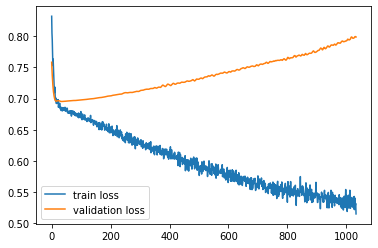

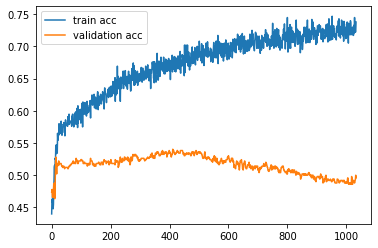

In [5]:
# training
dnn.train_model(num_epoch=300000, batch_size=30000, patience=1000)

## LSTM

In [ ]:
import pandas as pd 
import numpy as np
from MySQLConnection import *
from tqdm import tqdm 
import FeatureSelection
import FeatureEngineering
from Preprocessing import *
import Modeling
import tensorflow as tf 
from matplotlib import pyplot as plt

In [ ]:
# Preprocessing
time_shift = 10
preprocessing = Preprocessing(DB_info=mysql_auth.NYXLDB_FinalStat)
input_df = preprocessing.get_data_table_from_file('input_df_all.csv')
input_df = input_df.set_index(['MatchId', 'Map', 'Section', 'Timestamp', 'Team', 'Player'])
X, y = preprocessing.get_input_data_LSTM(
    input_df, time_shift=time_shift, features=['UltimateCharge', 'Position_x', 'Position_y', 'Position_z'], target=['RCP'])

In [ ]:
# set model
lstm = Modeling.ModelLSTM(X=X, y=y, time_shift=time_shift)
lstm.create_model()

In [ ]:
# training
lstm.train_model(num_epoch=3000, batch_size=3000, patience=300)

In [ ]:
# evaluate model
ev = lstm.evaluate_model(lstm.X_test, lstm.y_test)

## Match Log

In [ ]:
# match_preprocessing = Preprocessing(DB_info=mysql_auth.NYXL_DB_Match_FinalStat)
# match_preprocessing.DB_table_names
# input_df = match_preprocessing.get_data_table_from_DB()
# input_df.to_csv('input_df_match.csv')